## Statistical Inference Testing - Zillow & Predicting the Hot Housing Markets

##### After looking at the initial descriptive statistics of the Zillow data, there are a few areas that stand out for further exploration with inferential statistics:
1. Coastal vs Non-Coastal Regions - the states that saw the highest growth over the last 20 years are also on the coast.  Because of this I explored whether there was an overal significant difference in housing price growth rates of coastal vs non-coastal states.  The inferential statistical analysis showed that there is, in fact, a significant difference in the overall housing price growth among Coastal vs Non-Coastal states. Zip codes in coastal states saw 60% higher growth over the last 20 years, with a 95% confidence interval ranging from 57.1% to 62.1%. Coastal proximity seems to be a significant factor in housing price growth.

2. West Coast vs East Coast Regions - based on the overall higher growth in coastal regions, I wanted to further break that down by East and West Coast to see if the growth was more concentrated on one coast or the other.  The analysis showed that the West Coast saw significantly more growth, with 82.5% higher growth in housing prices over the last 20 years than East Coast states.

3. Household Income - Using another dataset with mean and median household incomes by zip code, I explored how areas with the highest, lowest and medium household incomes compare in overall growth rate of housing prices.

4. Volatility and Growth - in the descriptive statistics, some of the fastest-growing states also saw the biggest crashes in the housing crisis of the late 2000's.  I compared the regions that had bigger than average crashes with the regions with smaller than average crashes to understand the relationship.  The inferential statistical analysis showed that there is indeed a significant difference in growth between the zip codes that saw bigger declines in the 2000s housing crisis, vs those that saw smaller declines.  The zip codes with a big crash saw, on average, 21.7% higher growth than those with a small crash.


In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns
sns.set(color_codes=True)

In [19]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [20]:
homes1 = pd.DataFrame.from_csv('data/Zip_Zhvi_Summary_AllHomes.csv', index_col=None)
homes1 = homes1.sort_values('RegionName')
homes1.head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
5450,2017-05-31,58196,1001,MA,Springfield,Hampden,Agawam,5450,197100,0.005099,0.011288,0.066558,0.019908,-0.007074,2006-10,2006-Q4,216300,-0.088766,2005-07
3919,2017-05-31,58197,1002,MA,Springfield,Hampshire,Amherst,3919,318700,0.005363,0.016587,0.048011,0.025937,0.001041,2007-11,2007-Q4,323300,-0.014228,2007-07
10252,2017-05-31,58200,1005,MA,Worcester,Worcester,Town of Barre,10252,220600,-0.013417,-0.033304,0.063645,0.049449,0.000591,2006-04,2006-Q2,237100,-0.069591,2004-11
6404,2017-05-31,58201,1007,MA,Springfield,Hampshire,Town of Belchertown,6404,265200,-0.000377,0.001133,0.023148,0.024474,-0.002308,2006-10,2006-Q4,273900,-0.031763,2006-05
12905,2017-05-31,58202,1008,MA,Springfield,Hampden,Blandford,12905,221800,0.011861,0.031628,0.014639,0.015779,-0.002139,2010-02,2010-Q1,241300,-0.080812,2008-08


In [21]:
homes2 = pd.DataFrame.from_csv('data/Zip_Zhvi_AllHomes.csv', index_col=None)
homes2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1128500,1133300,1132900,1147300,1149800.0,1132700,1121400,1123000,1143700,1178700
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318600,318200,318100,318700,320200.0,321000,322200,323800,325900,327700
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,400700,401900,406000,414000,417800.0,417700,418700,414100,405400,401900
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113700,113800,113800,114100,114500.0,114900,115000,114700,114700,114800
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200000,198800,199200,200100,201500.0,203200,205200,206700,206600,205700


### Test 1 - Coastal vs. Non-Coastal States
Null Hypothesis: The growth rate of housing prices is the same for Coastal States as for Non-Coastal States: P1 - P2 = 0

Alternate Hypothesis: The growth rate of housing prices is not the same for Coastal States as for Non-Coastal States: P1 - P2 =! 0

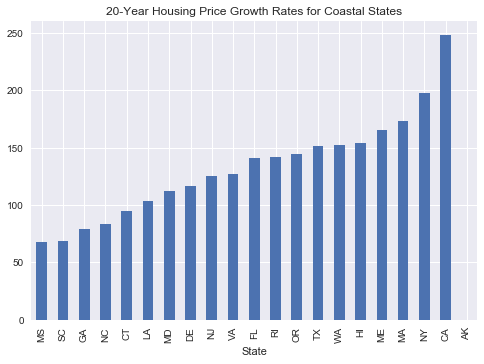

In [22]:
# Defining coastal states and viewing as a bar graph
h = homes2
coastal_states = 'HI,RI,CA,WA,OR,TX,LA,FL,NC,SC,GA,VA,MD,DE,NJ,NY,MS,CT,MA,ME,AK'.split(',')
h_coastal = h[h.State.isin(coastal_states)]
h_coastal = h_coastal.groupby(h_coastal.State).mean()
h_coastal['Percent_Growth'] = (h_coastal['2017-05'] / h_coastal['1996-04'] - 1) * 100 
h_coastal = h_coastal.round(2)
h_coastal = h_coastal.sort_values('Percent_Growth')
h_coastal.Percent_Growth.plot(kind = 'bar', title = "20-Year Housing Price Growth Rates for Coastal States")

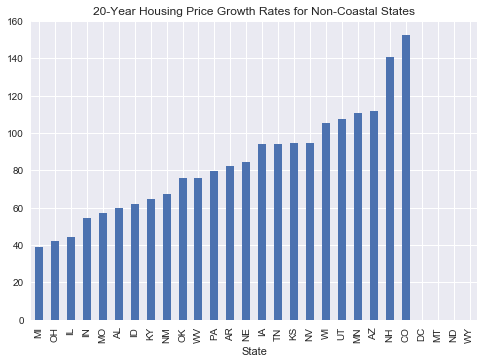

In [23]:
# Defining non-coastal states and viewing as a bar graph
h = homes2
h_not_coastal = h[~h.State.isin(coastal_states)]
h_not_coastal = h_not_coastal.groupby(h_not_coastal.State).mean()
h_not_coastal['Percent_Growth'] = (h_not_coastal['2017-05'] / h_not_coastal['1996-04'] - 1) * 100 
h_not_coastal = h_not_coastal.round(2)
h_not_coastal = h_not_coastal.sort_values('Percent_Growth')
h_not_coastal.Percent_Growth.plot(kind = 'bar', title = "20-Year Housing Price Growth Rates for Non-Coastal States")

In [24]:
# Defining the population for Coastal State Zip Codes
h_coastal = h[h.State.isin(coastal_states)]
h_coastal['Percent_Growth'] = (h_coastal['2017-05'] / h_coastal['1996-04'] - 1) * 100 
coastal_zips = len(h_coastal)
coastal_mean = h_coastal['Percent_Growth'].mean()
coastal_std = h_coastal['Percent_Growth'].std()

h_not_coastal = h[~h.State.isin(coastal_states)]
h_not_coastal['Percent_Growth'] = (h_not_coastal['2017-05'] / h_not_coastal['1996-04'] - 1) * 100 
not_coastal_zips = len(h_not_coastal)
not_coastal_mean = h_not_coastal['Percent_Growth'].mean()
not_coastal_std = h_not_coastal['Percent_Growth'].std()

mean = coastal_mean - not_coastal_mean
mean

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


56.53034078505458

In [25]:
# Standard Deviation of the differences in the means
std = ((coastal_std**2)/coastal_zips + (not_coastal_std**2)/not_coastal_zips)**(1/2.0)
std

1.0819219055641385

In [26]:
# Z Score for two-tailed test for alpha = .025 is 1.96.  95% confidence interval:
mean - 1.96*std, mean + 1.96*std

(54.409773850148866, 58.65090771996029)

##### Based on the 95% Confidence Interval, there is a very significant difference in the housing growth for coastal states vs non-coastal states.  Coastal states on average saw a 56.5% higher growth in housing prices over the last 20 years than non-coastal states.  If the coastal and non-coastal zip codes were actually the same, the confidence interval would have to include 0, which is does not.

### Test 2 - West Coast vs. East Coast States
Null Hypothesis: The growth rate of housing prices is the same for West Coast States as for East Coast States: P1 - P2 = 0

Alternate Hypothesis: The growth rate of housing prices is not the same for West Coast States as for East Coast States: P1 - P2 =! 0

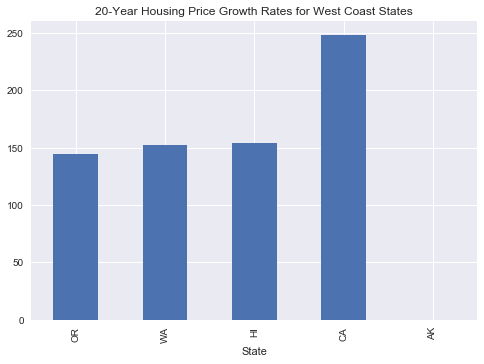

In [27]:
# Defining coastal states and viewing as a bar graph
h = homes2
pacific_states = 'HI,CA,WA,OR,AK'.split(',')
h_pacific = h[h.State.isin(pacific_states)]
h_pacific = h_pacific.groupby(h_pacific.State).mean()
h_pacific['Percent_Growth'] = (h_pacific['2017-05'] / h_pacific['1996-04'] - 1) * 100 
h_pacific = h_pacific.round(2)
h_pacific = h_pacific.sort_values('Percent_Growth')
h_pacific.Percent_Growth.plot(kind = 'bar', title = "20-Year Housing Price Growth Rates for West Coast States")

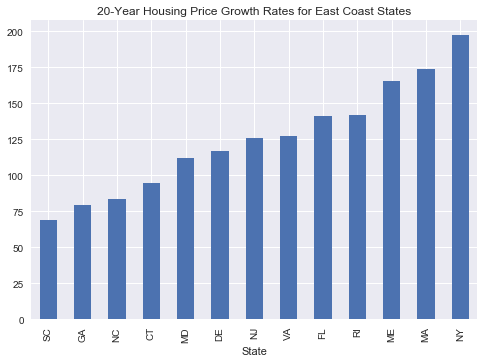

In [28]:
# Defining coastal states and viewing as a bar graph
h = homes2
atlantic_states = 'RI,FL,NC,SC,GA,VA,MD,DE,NJ,NY,CT,MA,ME'.split(',')
h_atlantic = h[h.State.isin(atlantic_states)]
h_atlantic = h_atlantic.groupby(h_atlantic.State).mean()
h_atlantic['Percent_Growth'] = (h_atlantic['2017-05'] / h_atlantic['1996-04'] - 1) * 100 
h_atlantic = h_atlantic.round(2)
h_atlantic = h_atlantic.sort_values('Percent_Growth')
h_atlantic.Percent_Growth.plot(kind = 'bar', title = "20-Year Housing Price Growth Rates for East Coast States")

In [29]:
# Finding the mean and standard deviation for growth in the the Pacific and Atlantic zip codes
h_pacific = h[h.State.isin(pacific_states)]
h_pacific['Percent_Growth'] = (h_pacific['2017-05'] / h_pacific['1996-04'] - 1) * 100 
pacific_zips = len(h_pacific)
pacific_mean = h_pacific['Percent_Growth'].mean()
pacific_std = h_pacific['Percent_Growth'].std()

h_atlantic = h[h.State.isin(atlantic_states)]
h_atlantic['Percent_Growth'] = (h_atlantic['2017-05'] / h_atlantic['1996-04'] - 1) * 100 
atlantic_zips = len(h_not_coastal)
atlantic_mean = h_atlantic['Percent_Growth'].mean()
atlantic_std = h_atlantic['Percent_Growth'].std()

mean = pacific_mean - atlantic_mean
mean

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


82.51399202295515

In [30]:
atlantic_mean

118.12550448589475

In [31]:
not_coastal_mean

83.10756888889834

ValueError: range parameter must be finite.

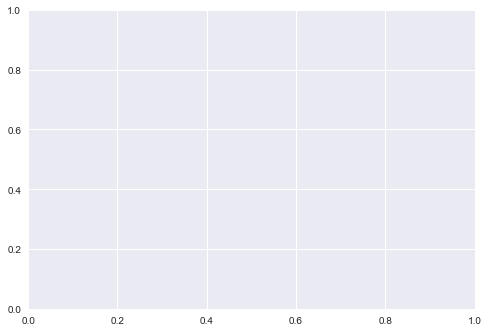

In [32]:
a = h_atlantic['Percent_Growth']
p = h_pacific['Percent_Growth']

bins = np.linspace(0, 700, 100)

plt.hist(a, bins, alpha=0.5, label='East Coast')
plt.hist(p, bins, alpha=0.5, label='West Coast')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Standard Deviation of the differences in the means
std = ((pacific_std**2)/pacific_zips + (atlantic_std**2)/atlantic_zips)**(1/2.0)
std

In [ ]:
# Z Score for two-tailed test for alpha = .025 is 1.96.  95% confidence interval:
mean - 1.96*std, mean + 1.96*std

##### Based on the 95% Confidence Interval, there is a significant difference in the housing growth for West Coast states vs East Coast states.  West Coast states on average saw a 82.5% higher growth in housing prices over the last 20 years than East Coast states. 

### Test 3 - High Household Income vs Low Household Income
Null Hypothesis: The growth rate of housing prices is the same for zip codes in the highest quartile of Household Income (HHI) as for the lowest quartile of HHI: P1 - P2 = 0
Alternate Hypothesis: The growth rate of housing prices is not the same for zip codes in the highest quartile and lowest quartile of HHI: P1 - P2 =! 0

In [ ]:
hhi = pd.DataFrame.from_csv('data/Income_by_zip.csv', index_col=None)
hhi.head()

In [ ]:
hhi.columns = ('RegionName', 'MedianIncome', 'MeanIncome', 'Pop')
hhi.head()

In [ ]:
#attempting to convert MeanIncome to numeric values
hhi['MeanIncome'].astype(int)
hhi.head()

#hhi['MeanIncome'].mean()

In [ ]:
df = hhi.join(h, on='RegionName', how='left', lsuffix= 'str', rsuffix= 'str', sort=False)
df.head()

In [ ]:
df['income_high'] = df['MeanIncome'] > 100000
df['income_med'] = (df['MeanIncome'] <= 100000) & (df['MeanIncome'] > 50000)
df['income_low'] = df['MeanIncome'] <= 50000

### Test 4 - High Volatility and High Growth

Null Hypothesis: The growth rate of housing prices is the same for zip codes that saw bigger than average declines during the late 2000's housing crisis (bigcrash) as for those that saw smaller than average declines (smallcrash): P1 - P2 = 0
Alternate Hypothesis: The growth rate of housing prices is not the same for bigcrash and smallcrash zip codes: P1 - P2 =! 0

In [ ]:
h = homes2
h['Percent_Dip'] = (h['2012-02'] / h['2006-07'] - 1) * 100 
h = h.sort_values('Percent_Dip')
h = h.round(2)
h.head()

In [ ]:
median_dip = h['Percent_Dip'].median()
median_dip

In [ ]:
h['Percent_Dip'].plot(kind = 'hist', bins = 10)
plt.show()

In [ ]:
# Defining the population for the Zip Codes that saw the biggest crashes vs smallest crashes
h_bigcrash = h[h.Percent_Dip < median_dip]
h_bigcrash['Percent_Growth'] = (h_bigcrash['2017-05'] / h_bigcrash['1996-04'] - 1) * 100 
bigcrash_zips = len(h_bigcrash)
bigcrash_mean = h_bigcrash['Percent_Growth'].mean()
bigcrash_std = h_bigcrash['Percent_Growth'].std()

h_smallcrash = h[h.Percent_Dip > median_dip]
h_smallcrash['Percent_Growth'] = (h_smallcrash['2017-05'] / h_smallcrash['1996-04'] - 1) * 100 
smallcrash_zips = len(h_smallcrash)
smallcrash_mean = h_smallcrash['Percent_Growth'].mean()
smallcrash_std = h_smallcrash['Percent_Growth'].std()

mean = bigcrash_mean - smallcrash_mean
mean

In [ ]:
# Standard Deviation of the differences in the means
std = ((bigcrash_std**2)/bigcrash_zips + (smallcrash_std**2)/smallcrash_zips)**(1/2.0)
std

In [ ]:
# Z Score for two-tailed test for alpha = .025 is 1.96.  95% confidence interval:
mean - 1.96*std, mean + 1.96*std


##### Based on the 95% Confidence Interval, there is a significant difference betweeen the zip codes that had a big crash vs small crash in terms of overall growth over the last 20 years.  The zip codes with a big crash saw, on average, 21.7% higher growth than those with a small crash.